In [1]:
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

## Загрузка данных

In [3]:
data = pd.read_csv('./train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'
cat_ind = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [8]:
#числовой признак TotalSpent приводим к числовому типу данных
data[data['TotalSpent']==' ']=0
data['TotalSpent'] = data['TotalSpent'].astype(float)

In [9]:
# И хотя в датасете нет nan, в признаке 'TotalSpent' присутствовало 9 пробелов, которые были заменены на нули, а позже удалены
data['TotalSpent'].value_counts()

0.00       9
20.20      9
19.75      8
19.65      6
20.05      6
          ..
990.45     1
4144.80    1
116.65     1
2659.45    1
150.00     1
Name: TotalSpent, Length: 4978, dtype: int64

In [10]:
data[data['TotalSpent']==0].index

Int64Index([1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598], dtype='int64')

In [11]:
#были замечены выбросы в значениях нескольких признаков: Sex, HasPartner, IsBillingPaperless, PaymentMethod 
#Поскольку нулевые значения этих признаков соответствуют одинаковым индексам и их не так много, эти строки можно удалить
data['PaymentMethod'].value_counts()

Electronic check             1786
Mailed check                 1188
Bank transfer (automatic)    1157
Credit card (automatic)      1142
0                               9
Name: PaymentMethod, dtype: int64

In [12]:
data[data['HasPartner']==0].index

Int64Index([1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598], dtype='int64')

In [13]:
data.drop(index = [1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598], inplace = True)

In [14]:
#классы несбалансированы
data['Churn'].value_counts()

0    3889
1    1384
Name: Churn, dtype: int64

## Анализ данных

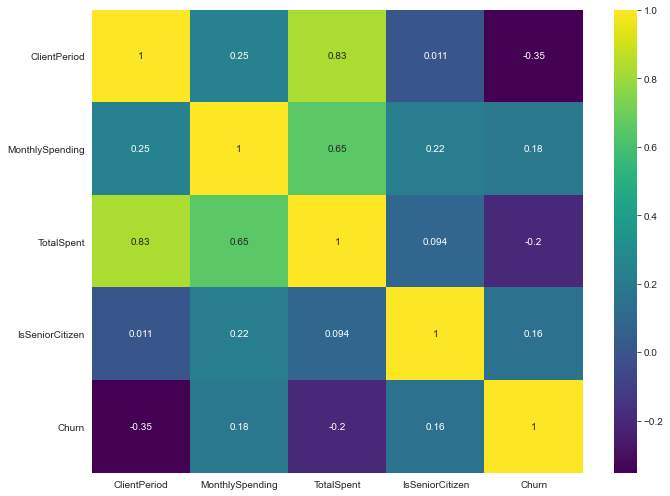

In [15]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)
plt.tight_layout()

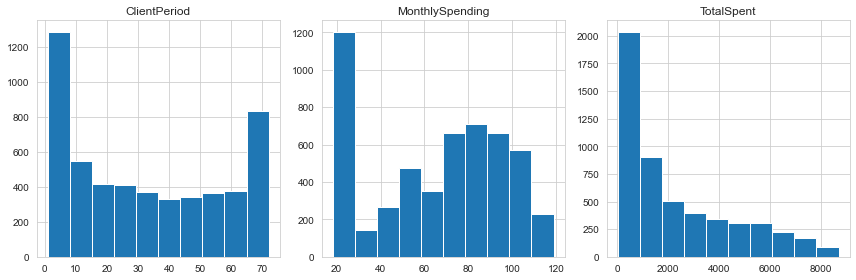

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):    
    axes[i].hist(data[num_cols[i]], label=num_cols[i])
    axes[i].set_title(num_cols[i])

plt.tight_layout()

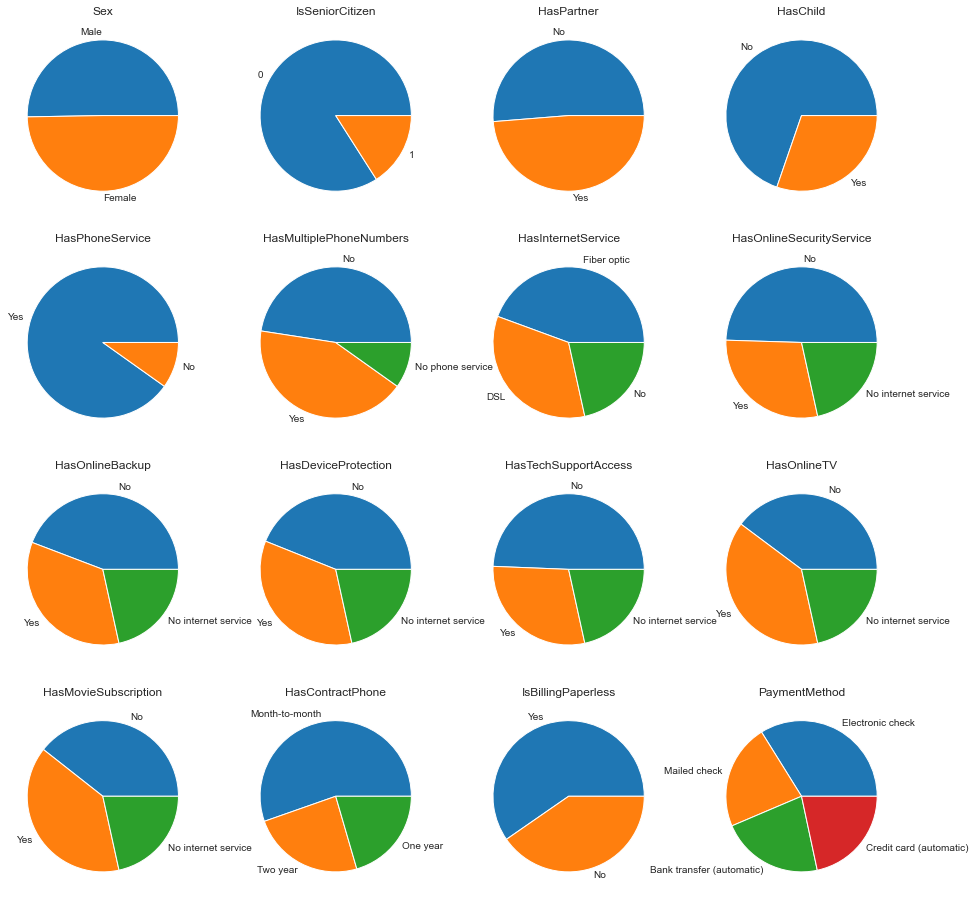

In [19]:
l=[[i,j] for i in range(4) for j in range(4)]
fig1, axs1 = plt.subplots(4,4)
for ind,col in enumerate(cat_cols):
    i,j=l[ind]
    axs1[i,j].pie(data[col].value_counts().to_list(), labels=data[col].value_counts().index)
    axs1[i,j].set_title(col)

fig1.set_size_inches(16, 16)

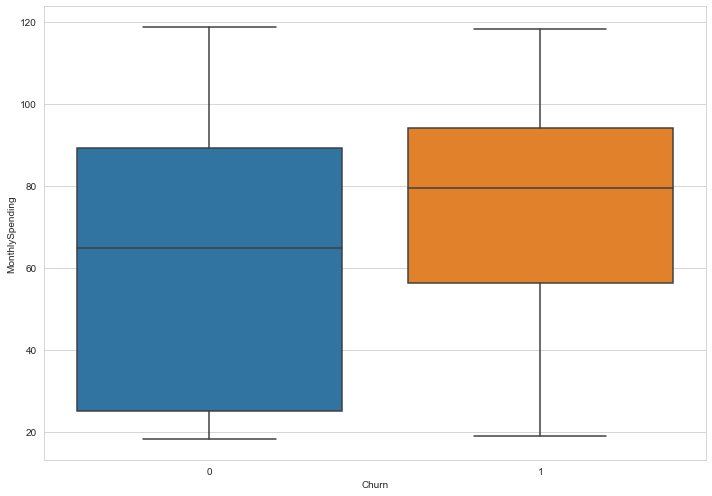

In [20]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Churn', y = 'MonthlySpending', data = data)
plt.tight_layout()

In [21]:
#разделение датасета на две части: числовой и категориальный
numeric_data = data[num_cols]

In [22]:
categorical_data = data[cat_cols]

In [23]:
categorical_data.head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


## Применение линейных моделей

In [24]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
#One-hot-encoding:
dummy_features = pd.get_dummies(categorical_data)

In [26]:
#слияние dummy_features с матрицей категориальных признаков:
X = pd.concat([numeric_data, dummy_features], axis = 1)

In [27]:
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [28]:
#target
y = data['Churn']

In [29]:
#разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size = 0.8, random_state = 42)

In [30]:
#нормировка признаков:
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [31]:
#подготовка к использованию GridSearch на нескольких алгоритмах 
classifier = [DecisionTreeClassifier(random_state = 42),
             SVC(random_state = 42),
             RandomForestClassifier(random_state = 42),
             LogisticRegression(random_state = 42),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,10)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,200,300],
                "criterion":["gini"],
                'max_depth': range(1,10)}

logreg_param_grid = {"C":[0.01, 0.1, 1, 10, 100],
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [32]:
#поиск наилучших параметров. Поиск занимает продолжительное время
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 5), scoring = "roc_auc", n_jobs = -1,verbose = 1)
    clf.fit(X_train_scal,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(classifier[i], cv_result[i], clf.best_params_)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1050 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:    4.2s finished


DecisionTreeClassifier(random_state=42) 0.8295436261675672 {'max_depth': 4, 'min_samples_split': 250}
Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   32.9s finished


SVC(random_state=42) 0.8346671557458208 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:  7.1min finished


RandomForestClassifier(random_state=42) 0.8428662488067685 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


LogisticRegression(random_state=42) 0.8447330556656611 {'C': 10, 'penalty': 'l2'}
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.6s


KNeighborsClassifier() 0.8149177113347748 {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.4s finished


In [33]:
#тренировка логистической регрессии на датасете
lgr = LogisticRegressionCV(penalty = 'l2', Cs = 10, random_state = 42, cv = StratifiedKFold(n_splits = 5))
lgr.fit(X_train_scal, y_train)

y_test_predicted = lgr.predict_proba(X_test_scal)[:, 1]

In [34]:
roc_auc_score(y_test, y_test_predicted)

0.8442368483132814

In [35]:
#разделяем тестовый датасет на числовые и категориальные признаки и делаем predict_proba
cat = test_data.iloc[:,3:]

In [36]:
cat['Sex'].value_counts()

Male      900
Female    861
Name: Sex, dtype: int64

In [37]:
num = test_data.iloc[:,0:3]

In [38]:
dum = pd.get_dummies(cat)

In [39]:
test_data = pd.concat([num, dum], axis = 1)

In [40]:
test_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,42,56.10,2386.85,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,29,98.50,3004.15,1,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
2,9,76.25,684.85,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,67,74.00,4868.4,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
4,71,20.10,1389.6,0,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0


In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  1761 non-null   int64  
 1   MonthlySpending                               1761 non-null   float64
 2   TotalSpent                                    1761 non-null   object 
 3   IsSeniorCitizen                               1761 non-null   int64  
 4   Sex_Female                                    1761 non-null   uint8  
 5   Sex_Male                                      1761 non-null   uint8  
 6   HasPartner_No                                 1761 non-null   uint8  
 7   HasPartner_Yes                                1761 non-null   uint8  
 8   HasChild_No                                   1761 non-null   uint8  
 9   HasChild_Yes                                  1761 non-null   u

In [42]:
test_data[test_data['TotalSpent']==' ']=0
test_data['TotalSpent'] = test_data['TotalSpent'].astype(float)

In [43]:
test_data_scal = scaler.fit_transform(test_data)

In [44]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = lgr.predict_proba(test_data_scal)[:,1]
submission.to_csv('./submission_linear.csv',index = False)

Скор на kaggle с логистической регрессией: 0.84375

## Применение градиентного бустинга

In [45]:
from catboost import CatBoostClassifier

In [46]:
#для catboost
df = pd.read_csv('./train.csv')

In [47]:
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [48]:
df1 = df.iloc[:, :-1]

In [49]:
t = df['Churn']

In [50]:
t

0       0
1       0
2       1
3       0
4       0
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5282, dtype: int64

In [51]:
df1_train, df1_test, t_train, t_test = train_test_split(df1.values, t.values, train_size = 0.8, random_state = 42)

In [52]:
#подбор гиперпараметров
catboost_model = CatBoostClassifier(cat_features=cat_ind, n_estimators = 200, eval_metric = 'AUC')
catboost_model.grid_search({'l2_leaf_reg': np.linspace(0.5,0.7,35),
                           'learning_rate': [0.04,0.05,0.06,0.07]},
                          df1_train, t_train, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8353857545
bestIteration = 128

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8353858	best: 0.8353858 (0)	total: 2.63s	remaining: 6m 6s

bestTest = 0.8367660168
bestIteration = 142

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8367660	best: 0.8367660 (1)	total: 5.47s	remaining: 6m 17s

bestTest = 0.8338401484
bestIteration = 160

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8338401	best: 0.8367660 (1)	total: 8.51s	remaining: 6m 28s

bestTest = 0.8366366172
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8366366	best: 0.8367660 (1)	total: 11.7s	remaining: 6m 38s




bestTest = 0.8405006326
bestIteration = 105

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8405006	best: 0.8409823 (13)	total: 1m 37s	remaining: 5m 2s

bestTest = 0.840320911
bestIteration = 185

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8403209	best: 0.8409823 (13)	total: 1m 39s	remaining: 4m 59s

bestTest = 0.8366941281
bestIteration = 190

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8366941	best: 0.8409823 (13)	total: 1m 43s	remaining: 4m 57s

bestTest = 0.8369708995
bestIteration = 133

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8369709	best: 0.8409823 (13)	total: 1m 45s	remainin


bestTest = 0.8390376984
bestIteration = 176

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
66:	loss: 0.8390377	best: 0.8409823 (13)	total: 3m 10s	remaining: 3m 27s

bestTest = 0.8371182712
bestIteration = 160

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
67:	loss: 0.8371183	best: 0.8409823 (13)	total: 3m 13s	remaining: 3m 24s

bestTest = 0.8383907005
bestIteration = 138

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
68:	loss: 0.8383907	best: 0.8409823 (13)	total: 3m 16s	remaining: 3m 21s

bestTest = 0.8366977226
bestIteration = 189

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
69:	loss: 0.8366977	best: 0.8409823 (13)	total: 3m 18s	remain


bestTest = 0.8375891419
bestIteration = 173

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
99:	loss: 0.8375891	best: 0.8412878 (90)	total: 4m 42s	remaining: 1m 52s

bestTest = 0.8378119968
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
100:	loss: 0.8378120	best: 0.8412878 (90)	total: 4m 45s	remaining: 1m 50s

bestTest = 0.8376358696
bestIteration = 157

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
101:	loss: 0.8376359	best: 0.8412878 (90)	total: 4m 48s	remaining: 1m 47s

bestTest = 0.8365539452
bestIteration = 81

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
102:	loss: 0.8365539	best: 0.8412878 (90)	total: 4m 50s	rema


bestTest = 0.8393180642
bestIteration = 169

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
132:	loss: 0.8393181	best: 0.8412878 (90)	total: 6m 16s	remaining: 19.8s

bestTest = 0.8374202036
bestIteration = 196

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
133:	loss: 0.8374202	best: 0.8412878 (90)	total: 6m 19s	remaining: 17s

bestTest = 0.8362340407
bestIteration = 139

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
134:	loss: 0.8362340	best: 0.8412878 (90)	total: 6m 22s	remaining: 14.2s

bestTest = 0.834476363
bestIteration = 187

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
135:	loss: 0.8344764	best: 0.8412878 (90)	total: 6m 24s	remainin

{'params': {'learning_rate': 0.06, 'l2_leaf_reg': 0.6294117647058823},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,

In [59]:
catboost_model = CatBoostClassifier(cat_features=cat_ind, n_estimators = 200, l2_leaf_reg = 0.6157894737,learning_rate = 0.05)
catboost_model.fit(df1_train, t_train)

0:	learn: 0.6588065	total: 17.5ms	remaining: 3.48s
1:	learn: 0.6307456	total: 33.6ms	remaining: 3.33s
2:	learn: 0.6036129	total: 47.1ms	remaining: 3.1s
3:	learn: 0.5802760	total: 58.3ms	remaining: 2.85s
4:	learn: 0.5606020	total: 73.3ms	remaining: 2.86s
5:	learn: 0.5435518	total: 85.9ms	remaining: 2.78s
6:	learn: 0.5285396	total: 94.2ms	remaining: 2.6s
7:	learn: 0.5176702	total: 101ms	remaining: 2.43s
8:	learn: 0.5048253	total: 114ms	remaining: 2.42s
9:	learn: 0.4942111	total: 126ms	remaining: 2.39s
10:	learn: 0.4858916	total: 138ms	remaining: 2.37s
11:	learn: 0.4768819	total: 153ms	remaining: 2.39s
12:	learn: 0.4688695	total: 161ms	remaining: 2.32s
13:	learn: 0.4620353	total: 172ms	remaining: 2.29s
14:	learn: 0.4558729	total: 184ms	remaining: 2.27s
15:	learn: 0.4504998	total: 199ms	remaining: 2.29s
16:	learn: 0.4458408	total: 218ms	remaining: 2.35s
17:	learn: 0.4414727	total: 233ms	remaining: 2.35s
18:	learn: 0.4388968	total: 244ms	remaining: 2.32s
19:	learn: 0.4347532	total: 259ms	re

170:	learn: 0.3548154	total: 2.32s	remaining: 394ms
171:	learn: 0.3546203	total: 2.34s	remaining: 381ms
172:	learn: 0.3538150	total: 2.35s	remaining: 368ms
173:	learn: 0.3535684	total: 2.37s	remaining: 354ms
174:	learn: 0.3534881	total: 2.38s	remaining: 340ms
175:	learn: 0.3531717	total: 2.39s	remaining: 326ms
176:	learn: 0.3531218	total: 2.41s	remaining: 313ms
177:	learn: 0.3525611	total: 2.42s	remaining: 299ms
178:	learn: 0.3524119	total: 2.44s	remaining: 286ms
179:	learn: 0.3519975	total: 2.45s	remaining: 272ms
180:	learn: 0.3515419	total: 2.46s	remaining: 258ms
181:	learn: 0.3512678	total: 2.48s	remaining: 245ms
182:	learn: 0.3508491	total: 2.49s	remaining: 232ms
183:	learn: 0.3506506	total: 2.54s	remaining: 221ms
184:	learn: 0.3504857	total: 2.56s	remaining: 207ms
185:	learn: 0.3495839	total: 2.57s	remaining: 194ms
186:	learn: 0.3489115	total: 2.58s	remaining: 180ms
187:	learn: 0.3487286	total: 2.6s	remaining: 166ms
188:	learn: 0.3486136	total: 2.61s	remaining: 152ms
189:	learn: 0

In [60]:
t_test_predict = catboost_model.predict_proba(df1_test)[:, 1]

In [61]:
roc_auc_score(t_test, t_test_predict)

0.8295153351003408

Скор на kaggle: 0.85183

In [125]:
X_test = pd.read_csv('test.csv')

In [185]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = catboost_model.predict_proba(X_test)[:,1]
submission.to_csv('./submission.csv',index = False)